In [5]:
import numpy as np
import matplotlib.pyplot as plt

lambda_rate  = {"gamma":            2.7,
                "kappa":            3., 
                "zp":               2.}  

In [41]:
def log_phi_MD(z, lambda_rate):
    """Logarithm of the Madau-Dickinson star formation rate density in [Mpc-3 yr-1]

    Args:
        z (np.ndarray): redshift
        args (dict): model parameters

    Returns:
        np.ndarray: log(SFRD)
    """
    gamma, kappa, zp = lambda_rate["gamma"], lambda_rate["kappa"], lambda_rate["zp"]

    return gamma*np.log1p(z) - np.log1p( ((z+1.)/(zp+1.))**(gamma+kappa) )


def phi_MD(z, lambda_rate):
    """Madau-Dickinson-like star formation rate density in [Mpc-3 yr-1]

    Args:
        z (np.ndarray): redshift
        lambda_rate (dict): parameters of the rate function with keys: ["gamma", "kappa", "zp"]

    Returns:
        np.ndarray: SFRD (not normalized!)
    """
    gamma, kappa, zp = lambda_rate["gamma"], lambda_rate["kappa"], lambda_rate["zp"]

    return (z+1.)**gamma / ( 1. + ((z+1.)/(zp+1.))**(gamma+kappa) )


def phi_MD_norm(z, lambda_rate):
    """Normalized Madau-Dickinson-like star formation rate density normalized so that R(z=0)=R0

    Args:
        z (np.ndarray): redshift
        lambda_rate (dict): parameters of the rate function with keys: ["R0", "gamma", "kappa", "zp"]

    Returns:
        np.ndarray: SFRD
    """
    R0, gamma, kappa, zp = lambda_rate["R0"], lambda_rate["gamma"], lambda_rate["kappa"], lambda_rate["zp"]

    return (1. + (zp + 1.)**(-gamma-kappa)) * R0 * phi_MD(z, lambda_rate)



def phi_MD_norm2(z, lambda_rate):
    """Normalized Madau-Dickinson-like star formation rate density normalized so that R(z=0)=R0

    Args:
        z (np.ndarray): redshift
        lambda_rate (dict): parameters of the rate function with keys: ["R0", "gamma", "kappa", "zp"]

    Returns:
        np.ndarray: SFRD
    """
    R0, gamma, kappa, zp = lambda_rate["R0"], lambda_rate["gamma"], lambda_rate["kappa"], lambda_rate["zp"]

    norm0  = 1. + (zp + 1.)**(-gamma-kappa)

    return norm0 * R0 * (z+1.)**gamma / (1. + ((z+1.)/(zp+1.))**(gamma+kappa))


In [4]:
z = np.linspace(0, 10, 100)

r1 = phi_MD(z, lambda_rate)
r2 = np.exp(log_phi_MD(z, lambda_rate))

In [25]:
%%time
[phi_MD2(z, lambda_rate) for z in np.linspace(0, 10, 10**6)]
print()


CPU times: user 671 ms, sys: 39.9 ms, total: 711 ms
Wall time: 709 ms


In [19]:
%%time
[np.exp(log_phi_MD(z, lambda_rate)) for z in np.linspace(0, 10, 10**6)]
print()


CPU times: user 3.44 s, sys: 26.5 ms, total: 3.47 s
Wall time: 3.46 s


In [46]:
%%time
lambda_rate["R0"] = 17.
[phi_MD_norm(z, lambda_rate) for z in np.linspace(0, 10, 10**6)]
print()


CPU times: user 1.19 s, sys: 9.47 ms, total: 1.2 s
Wall time: 1.2 s


In [45]:
%%time
lambda_rate["R0"] = 17.
[phi_MD_norm2(z, lambda_rate) for z in np.linspace(0, 10, 10**6)]
print()


CPU times: user 952 ms, sys: 39.7 ms, total: 991 ms
Wall time: 987 ms


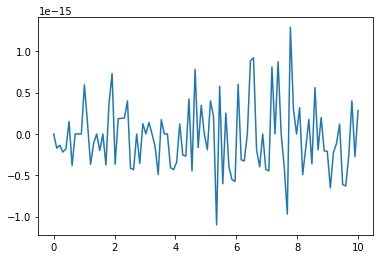

In [8]:
# plt.plot(z, r1, label="phi_MD")
# plt.plot(z, r2, label="log_phi_MD")

plt.plot(z, (r1-r2)/r2, label="ratio")

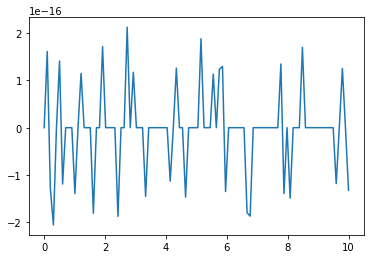

In [42]:
# plt.plot(z, r1, label="phi_MD")
# plt.plot(z, r2, label="log_phi_MD")
r1 = phi_MD_norm(z, lambda_rate)
r2 = phi_MD_norm2(z, lambda_rate)

plt.plot(z, (r1-r2)/r2, label="ratio")